<a href="https://colab.research.google.com/github/Samiimasmoudii/ML-Course-/blob/main/KNN_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python code uses the k-Nearest Neighbors (k-NN) algorithm to classify digits from the MNIST dataset. It performs the following steps:

Load and Preprocess the Data: The MNIST dataset (a collection of handwritten digit images) is fetched, and a subset of 5,000 data points is selected for faster computation. The data is split into training and test sets.

Model Training and Evaluation: For each value of k (the number of neighbors in the k-NN algorithm) from 2 to 15, the k-NN model is trained on the training data and evaluated on the test data. The classification error (1 - accuracy) is calculated for each k.

Optimal k Selection: The value of k that minimizes the error is identified and printed.

Visualization: A plot is generated to visualize the error as a function of k, helping to assess how the model's performance changes with different numbers of neighbors.

This code aims to find the optimal k for the k-NN classifier to minimize classification errors on the MNIST dataset.

Le k optimal est 3


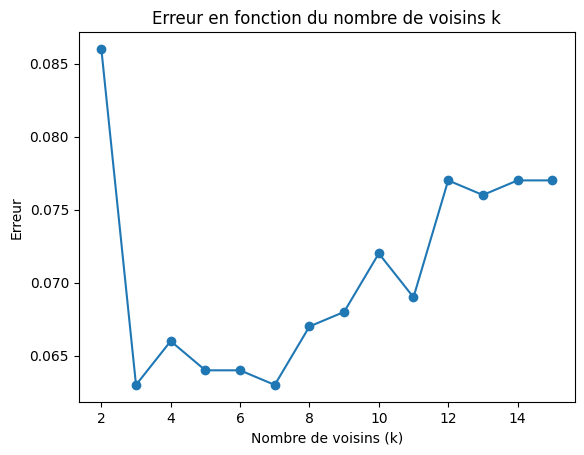

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split0
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Charger le dataset MNIST
mnist = fetch_openml('mnist_784')

# Séparer les données et les étiquettes
X, y = mnist['data'], mnist['target']

# Convertir les étiquettes en entiers (nécessaire pour scikit-learn)
y = y.astype(np.int8)

# Échantillonner un sous-ensemble des données (5000 points pour accélérer)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=5000, stratify=y, random_state=42)

# Diviser le jeu de données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Liste des k à tester
k_values = range(2, 16)
errors = []

# Tester le modèle k-NN pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Entraînement du modèle
    y_pred = knn.predict(X_test)  # Prédiction sur le jeu de test

    # Calculer l'erreur (1 - précision)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# Trouver le k optimal
k_optimal = k_values[np.argmin(errors)]
print(f"Le k optimal est {k_optimal}")

# Afficher la performance en fonction de k
plt.plot(k_values, errors, marker='o')
plt.title('Erreur en fonction du nombre de voisins k')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Erreur')
plt.show()


In [3]:
import pickle
pickle.dump(knn, open('knn3.pkl', 'wb'))


In [4]:
importedknn = pickle.load(open('knn3.pkl','rb'))

In [5]:
importedknn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)